In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading images

In [2]:
input_url = 'https://bocconi-my.sharepoint.com/:u:/g/personal/debora_nozza_unibocconi_it/EZD4agUTZyxMgv0u99Smxr8Bh-zrmPDGgnsm9z4J3gDc9w?e=jSrKOW'
output_dir = "train_images.tar.gz"

split_url = input_url.rfind('?')
converted_url = input_url[:split_url] + '?download=1'

!wget -O "$output_dir" "$converted_url"

--2022-11-17 09:22:05--  https://bocconi-my.sharepoint.com/:u:/g/personal/debora_nozza_unibocconi_it/EZD4agUTZyxMgv0u99Smxr8Bh-zrmPDGgnsm9z4J3gDc9w?download=1
Resolving bocconi-my.sharepoint.com (bocconi-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to bocconi-my.sharepoint.com (bocconi-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/debora_nozza_unibocconi_it/Documents/5.%20Corsi/Computer%20Vision%20-%202022-2023/DEEP%20LEARNING%20FOR%20COMPUTER%20VISION%20-%20PROJECT%20DATA/train_images.tar.gz?ga=1 [following]
--2022-11-17 09:22:05--  https://bocconi-my.sharepoint.com/personal/debora_nozza_unibocconi_it/Documents/5.%20Corsi/Computer%20Vision%20-%202022-2023/DEEP%20LEARNING%20FOR%20COMPUTER%20VISION%20-%20PROJECT%20DATA/train_images.tar.gz?ga=1
Reusing existing connection to bocconi-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 2721813810 (2.5G) [application/x-gzip]
S

In [3]:
input_url = 'https://bocconi-my.sharepoint.com/:u:/g/personal/debora_nozza_unibocconi_it/EXuJWfGHWN9DoGgCVZ7kMjcBH4M9WUylw1cSwf8b0n8_hA?e=LU8oHx'
output_dir = "validation_images.tar.gz"

split_url = input_url.rfind('?')
converted_url = input_url[:split_url] + '?download=1'

!wget -O "$output_dir" "$converted_url"

--2022-11-17 09:22:39--  https://bocconi-my.sharepoint.com/:u:/g/personal/debora_nozza_unibocconi_it/EXuJWfGHWN9DoGgCVZ7kMjcBH4M9WUylw1cSwf8b0n8_hA?download=1
Resolving bocconi-my.sharepoint.com (bocconi-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to bocconi-my.sharepoint.com (bocconi-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/debora_nozza_unibocconi_it/Documents/5.%20Corsi/Computer%20Vision%20-%202022-2023/DEEP%20LEARNING%20FOR%20COMPUTER%20VISION%20-%20PROJECT%20DATA/validation_images.tar.gz?ga=1 [following]
--2022-11-17 09:22:39--  https://bocconi-my.sharepoint.com/personal/debora_nozza_unibocconi_it/Documents/5.%20Corsi/Computer%20Vision%20-%202022-2023/DEEP%20LEARNING%20FOR%20COMPUTER%20VISION%20-%20PROJECT%20DATA/validation_images.tar.gz?ga=1
Reusing existing connection to bocconi-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 517500750 (494M) [application/

In [4]:
# imports
import tarfile
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os

In [5]:
# Extract train images
tar = tarfile.open("train_images.tar.gz", "r:gz")
tar.extractall('')
tar.close()

In [6]:
train_dir = '/content/train_images'
train_img = os.listdir(train_dir)

print('total training images:', len(train_img))

total training images: 27315


In [7]:
# Extract validation images
tar = tarfile.open("validation_images.tar.gz", "r:gz")
tar.extractall('')
tar.close()

In [8]:
validation_dir = '/content/train_images'
validation_img = os.listdir(validation_dir)

print('total validation images:', len(validation_img))

total validation images: 27315


# Import label and task information

In [9]:
import json
import pandas as pd
# loading labels file
labels = json.load(open("drive/MyDrive/imaterialist-challenge-FGVC2017/fgvc4_iMat.label_map.json"))

# turning labels dict into a df
labels_df = pd.DataFrame.from_dict(labels['labelInfo'])

# casting str into int
labels_df = labels_df.astype({'labelId': int})
labels_df.head()

,labelName,labelId
0,men,1
1,adult,2
2,black,3
3,women,4
4,flat,5


In [10]:
# loading tasks file
tasks = json.load(open("drive/MyDrive/imaterialist-challenge-FGVC2017/fgvc4_iMat.task_map.json"))
tasks.keys()

def f(x):
    return x.split(":")[0][0], x.split(":")[0][1]

# turning tasks dict into a df
tasks_df = pd.DataFrame.from_dict(tasks['taskInfo'])

# casting str to int
tasks_df = tasks_df.astype({'taskId': int})

# splitting the task name into two columns
tasks_df[['category', 'label_to_predict']] = pd.DataFrame((tasks_df.apply(lambda x: f(x.str), axis=1)).tolist(), 
                                                          index=tasks_df.index)
tasks_df.head()

,taskName,taskId,category,label_to_predict
0,shoe:gender,1,shoe,gender
1,shoe:age,2,shoe,age
2,shoe:color,3,shoe,color
3,shoe:up height,4,shoe,up height
4,dress:decoration,5,dress,decoration


# Importing train dataset

In [11]:
# loading training images file
train = json.load(open("drive/MyDrive/imaterialist-challenge-FGVC2017/fgvc4_iMat.train.data.json"))
annotations_df = pd.DataFrame.from_records(train['annotations']).astype(int)

## Drop images id not present in the folder

In [12]:
train_img_ids = [int(x[:-4]) for x in train_img] # get number ids

In [13]:
annotations_df_keep = annotations_df[annotations_df.imageId.isin(train_img_ids)]
print('All annotations:', len(annotations_df), '\nAnnotations of images we have:', len(annotations_df_keep))

All annotations: 62088 
Annotations of images we have: 41891


In [14]:
category_df = pd.merge(annotations_df_keep, tasks_df,right_on = 'taskId', left_on = 'taskId')
category_df = category_df[['taskId', 'imageId', 'category']]
category_df.head()

,taskId,imageId,category
0,5,1,dress
1,5,41,dress
2,5,97,dress
3,5,108,dress
4,5,116,dress


In [15]:
shoe_imgs = set(category_df[category_df.category == 'shoe'].imageId.unique())
dress_imgs = set(category_df[category_df.category == 'dress'].imageId.unique())
pants_imgs = set(category_df[category_df.category == 'pants'].imageId.unique())
out_imgs = set(category_df[category_df.category == 'outerwear'].imageId.unique())

len(shoe_imgs)+len(dress_imgs)+len(pants_imgs)+len(out_imgs)

27339

Controlliamo se alcuni image id sono in più di un set.


In [16]:
shoe_imgs.intersection(dress_imgs)

{292, 11378, 13466}

In [53]:
shoe_imgs.intersection(pants_imgs)

{37654}

In [54]:
shoe_imgs.intersection(out_imgs)

{4090, 6631, 32978}

In [55]:
dress_imgs.intersection(pants_imgs)

set()

In [56]:
dress_imgs.intersection(out_imgs)

{15601}

In [57]:
pants_imgs.intersection(out_imgs)

{2097,
 4884,
 5822,
 11124,
 12443,
 12728,
 13479,
 13515,
 22732,
 24854,
 26795,
 27113,
 28016,
 28282,
 31917,
 39406}

In [17]:
to_drop = [292, 11378, 13466, 37654, 4090, 6631, 32978, 15601, 2097,
 4884,
 5822,
 11124,
 12443,
 12728,
 13479,
 13515,
 22732,
 24854,
 26795,
 27113,
 28016,
 28282,
 31917,
 39406]

24 immagini appartengono a due categorie.

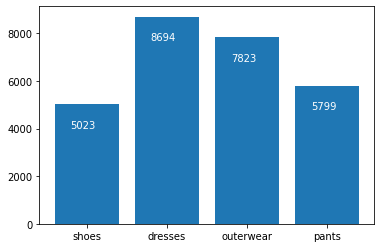

In [18]:
import matplotlib.pyplot as plt
values = [len(x) for x in (shoe_imgs, dress_imgs, out_imgs, pants_imgs)]
labels = ['shoes','dresses','outerwear','pants']
plt.bar(x = [0,1,2,3], height = values)
for i, v in enumerate(values):
    plt.text(i-0.2, v-1000, str(v), color = 'white')
plt.xticks(ticks = [0,1,2,3], labels = labels)
plt.show()

In [19]:
len(category_df.imageId.unique())

27315

In [20]:
category_df = category_df.drop(columns = ['taskId'])
category_df = category_df.drop_duplicates()

In [21]:
category_df[~category_df.imageId.isin(to_drop)]

,imageId,category
0,1,dress
1,41,dress
2,97,dress
3,108,dress
4,116,dress
...,...,...
41809,33120,pants
41810,33601,pants
41811,33735,pants
41813,33952,pants


## Create label folders and move images

In [38]:
dress_df = category_df[category_df.category == 'dress']
pants_df = category_df[category_df.category == 'pants']
out_df = category_df[category_df.category == 'outerwear']
shoes_df = category_df[category_df.category == 'shoes']

In [69]:
import os
from os import listdir
import shutil

for i in ['pants', 'shoes', 'outerwear', 'dress']:
    base_dir = '/content/project/train'
    source = '/content/train_images'

    destination = os.path.join(base_dir, i)

    # gather all files
    allfiles = list(category_df[category_df.category == i].imageId.unique())

    # iterate on all files to move them to destination folder
    for f in allfiles:
        f = str(f) + '.jpg'
        src_path = os.path.join(source, f)
        dst_path = os.path.join(destination, f)
        shutil.copy(src_path, dst_path)

# Import validation dataset

In [22]:
# loading training images file
validation = json.load(open("drive/MyDrive/imaterialist-challenge-FGVC2017/fgvc4_iMat.validation.data.json"))
annotations_df_val = pd.DataFrame.from_records(validation['annotations']).astype(int)

## Drop images id not present in the folder

In [23]:
validation_img_ids = [int(x[:-4]) for x in validation_img] # get number ids

In [24]:
annotations_df_keep_val = annotations_df_val[annotations_df_val.imageId.isin(validation_img_ids)]
print('All annotations:', len(annotations_df_val), '\nAnnotations of images we have:', len(annotations_df_keep_val))

All annotations: 12406 
Annotations of images we have: 7713


In [25]:
category_df_val = pd.merge(annotations_df_keep_val, tasks_df,right_on = 'taskId', left_on = 'taskId')
category_df_val = category_df_val[['taskId', 'imageId', 'category']]
category_df_val.head()

,taskId,imageId,category
0,1,1,shoe
1,1,7,shoe
2,1,24,shoe
3,1,39,shoe
4,1,54,shoe


In [26]:
shoe_imgs_val = set(category_df_val[category_df_val.category == 'shoe'].imageId.unique())
dress_imgs_val = set(category_df_val[category_df_val.category == 'dress'].imageId.unique())
pants_imgs_val = set(category_df_val[category_df_val.category == 'pants'].imageId.unique())
out_imgs_val = set(category_df_val[category_df_val.category == 'outerwear'].imageId.unique())

len(shoe_imgs_val)+len(dress_imgs_val)+len(pants_imgs_val)+len(out_imgs_val)

5238

In [27]:
shoe_imgs_val.intersection(dress_imgs_val)

{4821}

In [28]:
shoe_imgs_val.intersection(pants_imgs_val)

{3717}

In [29]:
shoe_imgs_val.intersection(out_imgs_val)

{825}

In [30]:
dress_imgs_val.intersection(pants_imgs_val)

{1743}

In [31]:
dress_imgs_val.intersection(out_imgs_val)

{1694, 2653}

In [32]:
pants_imgs_val.intersection(out_imgs_val)

{367, 7238}

In [33]:
to_drop_val = [4821,3717,825, 1743,1694, 2653,367, 7238]

In [35]:
category_df_val = category_df_val.drop(columns = ['taskId'])
category_df_val = category_df_val.drop_duplicates()

In [36]:
category_df_val[~category_df_val.imageId.isin(to_drop)]

,imageId,category
0,1,shoe
1,7,shoe
2,24,shoe
3,39,shoe
4,54,shoe
...,...,...
7703,3802,shoe
7704,5219,shoe
7705,6839,shoe
7708,7526,shoe


## Create label folders and move images

In [37]:
dress_df_val = category_df_val[category_df_val.category == 'dress']
pants_df_val = category_df_val[category_df_val.category == 'pants']
out_df_val = category_df_val[category_df_val.category == 'outerwear']
shoes_df_val = category_df_val[category_df_val.category == 'shoes']

In [ ]:
for i in ['pants', 'shoes', 'outerwear', 'dress']:
    base_dir_val = '/content/project/validation'
    source_val = '/content/validation_images'

    destination_val = os.path.join(base_dir_val, i)

    # gather all files
    allfiles_val = list(category_df_val[category_df_val.category == i].imageId.unique())

    # iterate on all files to move them to destination folder
    for f in allfiles_val:
        f = str(f) + '.jpg'
        src_path_val = os.path.join(source_val, f)
        dst_path_val = os.path.join(destination_val, f)
        shutil.copy(src_path_val, dst_path_val)

# Data preprocessing

# Other tasks

In [ ]:
# check for tasks with highest number of images
a = annotations_df_keep.groupby('taskId').count().sort_values('labelId')
pd.merge(a, tasks_df, 
         right_on = 'taskId', left_on = 'taskId').sort_values('labelId', ascending = False).head(10)

,taskId,labelId,imageId,taskName,category,label_to_predict
44,21,2952,2952,outerwear:material,outerwear,material
43,14,2825,2825,dress:occasion,dress,occasion
42,6,2705,2705,dress:color,dress,color
41,17,2561,2561,outerwear:color,outerwear,color
40,11,2166,2166,pants:color,pants,color
39,3,2063,2063,shoe:color,shoe,color
38,26,1812,1812,pants:material,pants,material
37,13,1615,1615,outerwear:type,outerwear,type
36,24,1589,1589,pants:decoration,pants,decoration
35,5,1478,1478,dress:decoration,dress,decoration


In [ ]:
# create complete df with image id, category, task info and label info
temp = pd.merge(annotations_df_keep, labels_df, how = 'inner')
complete = pd.merge(temp, tasks_df, how = 'inner')
complete = complete[['imageId', 'category', 'taskId','taskName','label_to_predict','labelId','labelName']]
complete.head()

,imageId,category,taskId,taskName,label_to_predict,labelId,labelName
0,1,dress,5,dress:decoration,decoration,6,printed
1,108,dress,5,dress:decoration,decoration,6,printed
2,203,dress,5,dress:decoration,decoration,6,printed
3,864,dress,5,dress:decoration,decoration,6,printed
4,1058,dress,5,dress:decoration,decoration,6,printed


In [ ]:
# task to investigate
t = 21
task_t_df = complete[complete.taskId == t]

Number of images: 2589
Number of unique labels: 44


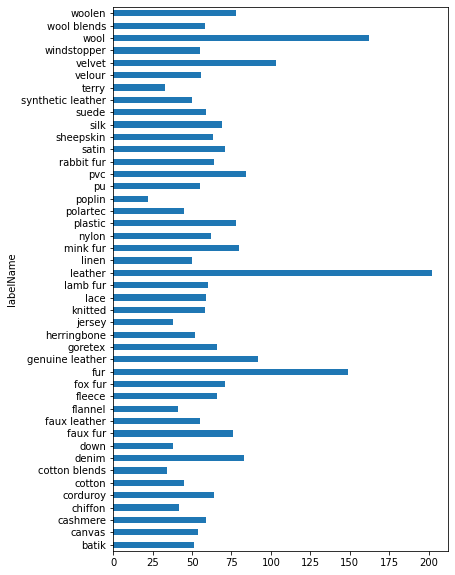

In [ ]:
print('Number of images:', len(task_t_df.imageId.unique()))
print('Number of unique labels:', len(task_t_df.labelId.unique()))
task_t_df.groupby('labelName').count()['imageId'].plot.barh(figsize = (6,10))
plt.show()